In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm
from scipy.optimize import curve_fit    
sns.set(context= 'talk',style='ticks',font_scale=1,rc ={'axes.spines.right': False,'axes.spines.top': False,'pdf.fonttype':42},palette='colorblind')

In [136]:
data=pd.read_csv('data/ODin_Data.txt',sep='\t').iloc[1:,:].astype(int)
data.index=data.index.astype(int)/60
data.index.name='Time (hrs)'
data.columns=['%s%s'%(i,j) for i in 'ABCDEFGH' for j in range(1,9) ]
data

,A1,A2,A3,A4,A5,A6,A7,A8,B1,B2,...,G7,G8,H1,H2,H3,H4,H5,H6,H7,H8
Time (hrs),,,,,,,,,,,,,,,,,,,,,
0.033333,1637,1609,1632,1630,1633,1621,1624,1625,1587,1588,...,1614,1598,1602,1591,1617,1622,1616,1602,1605,1597
0.366667,1635,1627,1623,1666,1639,1553,1514,1614,1537,1562,...,1615,1578,1647,1638,1656,1648,1645,1657,1618,1661
0.700000,1617,1547,1615,1641,1604,1520,1466,1574,1513,1547,...,1617,1557,1642,1622,1645,1636,1629,1646,1600,1660
1.033333,1616,1531,1614,1641,1591,1482,1439,1546,1500,1540,...,1624,1549,1643,1634,1645,1631,1628,1651,1599,1667
1.366667,1612,1517,1608,1651,1582,1459,1420,1538,1489,1530,...,1630,1549,1639,1631,1647,1625,1621,1643,1589,1665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136.366667,1707,2111,3160,2669,2894,4297,5690,1439,1668,1887,...,3348,1431,1863,2021,2651,2941,2974,3557,3995,1773
136.700000,1705,2119,3164,2669,2863,4298,5689,1440,1668,1889,...,3350,1432,1858,2026,2646,2946,2970,3569,4007,1775
137.033333,1710,2120,3160,2669,2860,4297,5684,1440,1665,1887,...,3344,1429,1865,2020,2652,2943,2975,3562,4002,1774


In [137]:
layout=pd.read_excel('data/ODin_Tube_Map.xlsx',sheet_name='Layout')
layout=layout.dropna()
layout.index=layout.Position
layout.drop('Position',axis=1,inplace=True)
layout_dict=layout.to_dict()['Condition']
layout_dict

{'A1': 'A1',
 'A2': 'B1',
 'A3': 'C1',
 'A4': 'D1',
 'A5': 'E1',
 'A6': 'F1',
 'A7': 'G1',
 'A8': 'A9',
 'B1': 'A2',
 'B2': 'B2',
 'B3': 'C2',
 'B4': 'D2',
 'B5': 'E2',
 'B6': 'F2',
 'B7': 'G2',
 'B8': 'B9',
 'C1': 'A3',
 'C2': 'B3',
 'C3': 'C3',
 'C4': 'D3',
 'C5': 'E3',
 'C6': 'F3',
 'C7': 'G3',
 'C8': 'C9',
 'D1': 'A4',
 'D2': 'B4',
 'D3': 'C4',
 'D4': 'D4',
 'D5': 'E4',
 'D6': 'F4',
 'D7': 'G4',
 'D8': 'D9',
 'E1': 'A5',
 'E2': 'B5',
 'E3': 'C5',
 'E4': 'D5',
 'E5': 'E5',
 'E6': 'F5',
 'E7': 'G5',
 'E8': 'E9',
 'F1': 'A6',
 'F2': 'B6',
 'F3': 'C6',
 'F4': 'D6',
 'F5': 'E6',
 'F6': 'F6',
 'F7': 'G6',
 'F8': 'F9',
 'G1': 'A7',
 'G2': 'B7',
 'G3': 'C7',
 'G4': 'D7',
 'G5': 'E7',
 'G6': 'F7',
 'G7': 'G7',
 'G8': 'G9',
 'H1': 'A8',
 'H2': 'B8',
 'H3': 'C8',
 'H4': 'D8',
 'H5': 'E8',
 'H6': 'F8',
 'H7': 'G8'}

In [138]:
ODs=pd.read_excel('data/ODin_Tube_Map.xlsx',sheet_name='ODs',index_col=0)
ODs

,OD1,OD2
Condition,,
A1,0.013,0.022
A2,0.011,0.020
A3,0.011,0.017
A4,0.015,0.023
A5,0.011,0.019
...,...,...
G6,0.012,0.174
G7,0.011,0.199
G8,0.013,0.187


In [139]:
media=pd.read_excel('data/ODin_Tube_Map.xlsx',sheet_name='Conditions'
                   )
media.index=media.Condition
media_dict=media.Media.to_dict()
media_dict

{'A': '1 mM Nitrate',
 'B': '2 mM Nitrate',
 'C': '4 mM Nitrate',
 'D': '8 mM Nitrate',
 'E': '10 mM Nitrate',
 'F': '20 mM Nitrate',
 'G': '40 mM Nitrate'}

In [140]:
condition_dict={}
for key in layout_dict:
    item=layout_dict[key]
    if '11' in item or '12' in item:
        cond = media_dict[item[0]] + ',Blank'
    else:
        cond = media_dict[item[0]] + ',Rep%s'%(item[1:])
    condition_dict[key]=cond
condition_dict

{'A1': '1 mM Nitrate,Rep1',
 'A2': '2 mM Nitrate,Rep1',
 'A3': '4 mM Nitrate,Rep1',
 'A4': '8 mM Nitrate,Rep1',
 'A5': '10 mM Nitrate,Rep1',
 'A6': '20 mM Nitrate,Rep1',
 'A7': '40 mM Nitrate,Rep1',
 'A8': '1 mM Nitrate,Rep9',
 'B1': '1 mM Nitrate,Rep2',
 'B2': '2 mM Nitrate,Rep2',
 'B3': '4 mM Nitrate,Rep2',
 'B4': '8 mM Nitrate,Rep2',
 'B5': '10 mM Nitrate,Rep2',
 'B6': '20 mM Nitrate,Rep2',
 'B7': '40 mM Nitrate,Rep2',
 'B8': '2 mM Nitrate,Rep9',
 'C1': '1 mM Nitrate,Rep3',
 'C2': '2 mM Nitrate,Rep3',
 'C3': '4 mM Nitrate,Rep3',
 'C4': '8 mM Nitrate,Rep3',
 'C5': '10 mM Nitrate,Rep3',
 'C6': '20 mM Nitrate,Rep3',
 'C7': '40 mM Nitrate,Rep3',
 'C8': '4 mM Nitrate,Rep9',
 'D1': '1 mM Nitrate,Rep4',
 'D2': '2 mM Nitrate,Rep4',
 'D3': '4 mM Nitrate,Rep4',
 'D4': '8 mM Nitrate,Rep4',
 'D5': '10 mM Nitrate,Rep4',
 'D6': '20 mM Nitrate,Rep4',
 'D7': '40 mM Nitrate,Rep4',
 'D8': '8 mM Nitrate,Rep9',
 'E1': '1 mM Nitrate,Rep5',
 'E2': '2 mM Nitrate,Rep5',
 'E3': '4 mM Nitrate,Rep5',
 'E4': '

In [144]:
mapped=data.copy()
mapped=mapped.stack().reset_index()
mapped.columns=['Time (hrs)','Layout','mA']
mapped['Condition']=mapped.Layout.map(condition_dict).fillna('Empty')
mapped

,Time (hrs),Layout,mA,Condition
0,0.033333,A1,1637,"1 mM Nitrate,Rep1"
1,0.033333,A2,1609,"2 mM Nitrate,Rep1"
2,0.033333,A3,1632,"4 mM Nitrate,Rep1"
3,0.033333,A4,1630,"8 mM Nitrate,Rep1"
4,0.033333,A5,1633,"10 mM Nitrate,Rep1"
...,...,...,...,...
26491,137.700000,H4,2945,"8 mM Nitrate,Rep8"
26492,137.700000,H5,2974,"10 mM Nitrate,Rep8"
26493,137.700000,H6,3568,"20 mM Nitrate,Rep8"
26494,137.700000,H7,4003,"40 mM Nitrate,Rep8"


In [145]:
mapped['OD1']=np.nan
mapped['OD2']=np.nan
for i in mapped.index:
    pos = mapped.loc[i,'Layout']
    if pos in layout_dict:
        mapped.loc[i,['OD1','OD2']]=ODs.loc[layout_dict[pos]].values
mapped

,Time (hrs),Layout,mA,Condition,OD1,OD2
0,0.033333,A1,1637,"1 mM Nitrate,Rep1",0.013,0.022
1,0.033333,A2,1609,"2 mM Nitrate,Rep1",0.012,0.044
2,0.033333,A3,1632,"4 mM Nitrate,Rep1",0.013,0.088
3,0.033333,A4,1630,"8 mM Nitrate,Rep1",0.014,0.101
4,0.033333,A5,1633,"10 mM Nitrate,Rep1",0.013,0.108
...,...,...,...,...,...,...
26491,137.700000,H4,2945,"8 mM Nitrate,Rep8",0.011,0.094
26492,137.700000,H5,2974,"10 mM Nitrate,Rep8",0.010,0.107
26493,137.700000,H6,3568,"20 mM Nitrate,Rep8",0.014,0.137
26494,137.700000,H7,4003,"40 mM Nitrate,Rep8",0.013,0.187


In [146]:
reps=[]
conds=[]
for i in mapped.Condition:
    j=i.split(',')[0]
    if i != 'Empty':
        i=i.split(',')[1][3:]
    else:
        i=np.nan
    reps.append(i)
    conds.append(j)
mapped['media']=conds
mapped['replicate']=reps
mapped

,Time (hrs),Layout,mA,Condition,OD1,OD2,media,replicate
0,0.033333,A1,1637,"1 mM Nitrate,Rep1",0.013,0.022,1 mM Nitrate,1
1,0.033333,A2,1609,"2 mM Nitrate,Rep1",0.012,0.044,2 mM Nitrate,1
2,0.033333,A3,1632,"4 mM Nitrate,Rep1",0.013,0.088,4 mM Nitrate,1
3,0.033333,A4,1630,"8 mM Nitrate,Rep1",0.014,0.101,8 mM Nitrate,1
4,0.033333,A5,1633,"10 mM Nitrate,Rep1",0.013,0.108,10 mM Nitrate,1
...,...,...,...,...,...,...,...,...
26491,137.700000,H4,2945,"8 mM Nitrate,Rep8",0.011,0.094,8 mM Nitrate,8
26492,137.700000,H5,2974,"10 mM Nitrate,Rep8",0.010,0.107,10 mM Nitrate,8
26493,137.700000,H6,3568,"20 mM Nitrate,Rep8",0.014,0.137,20 mM Nitrate,8
26494,137.700000,H7,4003,"40 mM Nitrate,Rep8",0.013,0.187,40 mM Nitrate,8


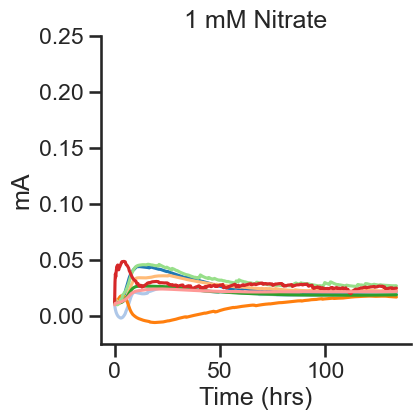

<Figure size 640x480 with 0 Axes>

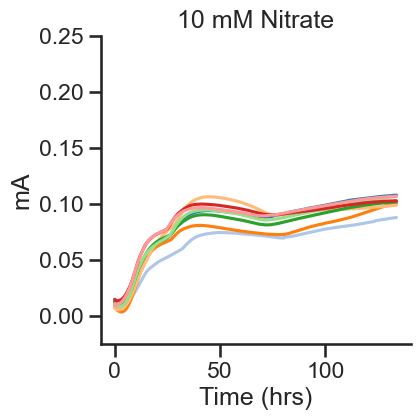

<Figure size 640x480 with 0 Axes>

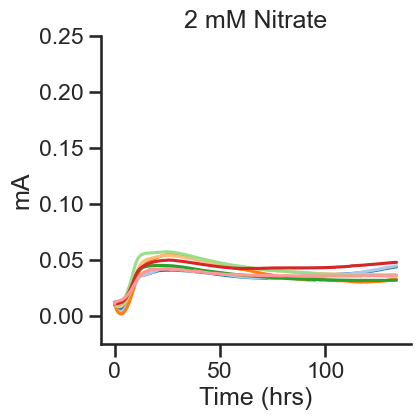

<Figure size 640x480 with 0 Axes>

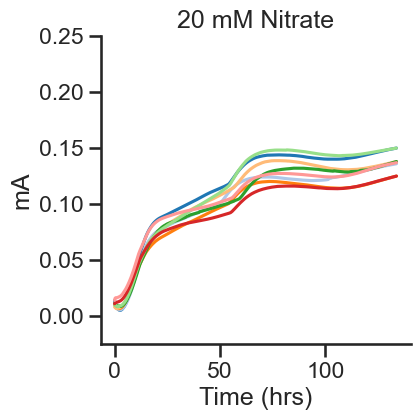

<Figure size 640x480 with 0 Axes>

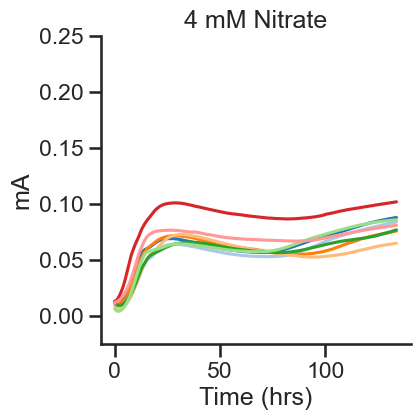

<Figure size 640x480 with 0 Axes>

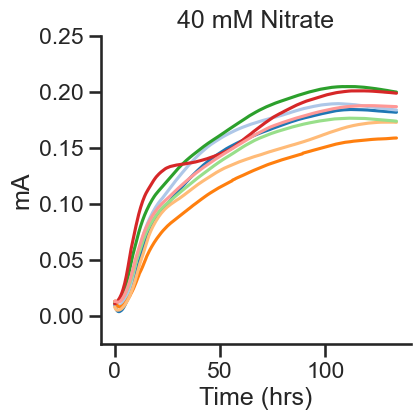

<Figure size 640x480 with 0 Axes>

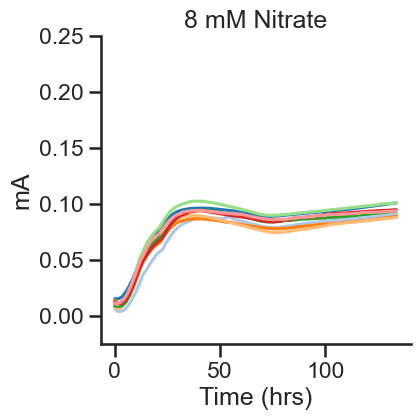

<Figure size 640x480 with 0 Axes>

In [147]:
colors=sns.color_palette('tab20',12)
from scipy.stats import linregress
colors=sns.color_palette('tab20',12)
lags={}
maxOD={}
for media,df in mapped.groupby(by='media'):
    if media =='Empty':
        break
    plt.figure(figsize=(4,4))
    plt.title(media)
    lags[media]=[]
    maxOD[media]=[]
    i=0
  
    for rep,df2 in df.groupby(by='replicate'):
        if rep == '9':
            continue
        df2=df2.loc[:,['Time (hrs)','mA','OD1','OD2']]
        ewm=df2.ewm(span = 25).mean()
        x=ewm.iloc[[0,-1]]['mA'].values
        y=ewm[['OD1','OD2']].iloc[0].values
        fit = linregress(x,y)
        
        x2=ewm['Time (hrs)'].values
        y2=ewm['mA'].values
        y3=fit.slope*y2+fit.intercept
        if len(x2[y3>.1]) > 0:
            lag=x2[y3>.1][0]
        else:
            lag=x2[-1]
        lags[media].append(lag)
        maxOD[media].append(y3.max())
        #y2=y2/y2.max()
        plt.plot(x2,y3,color=colors[i])
        i+=1
    plt.xlabel('Time (hrs)')
    plt.ylabel('mA')
    plt.ylim(-.025,.25)
    plt.show()
    plt.clf()

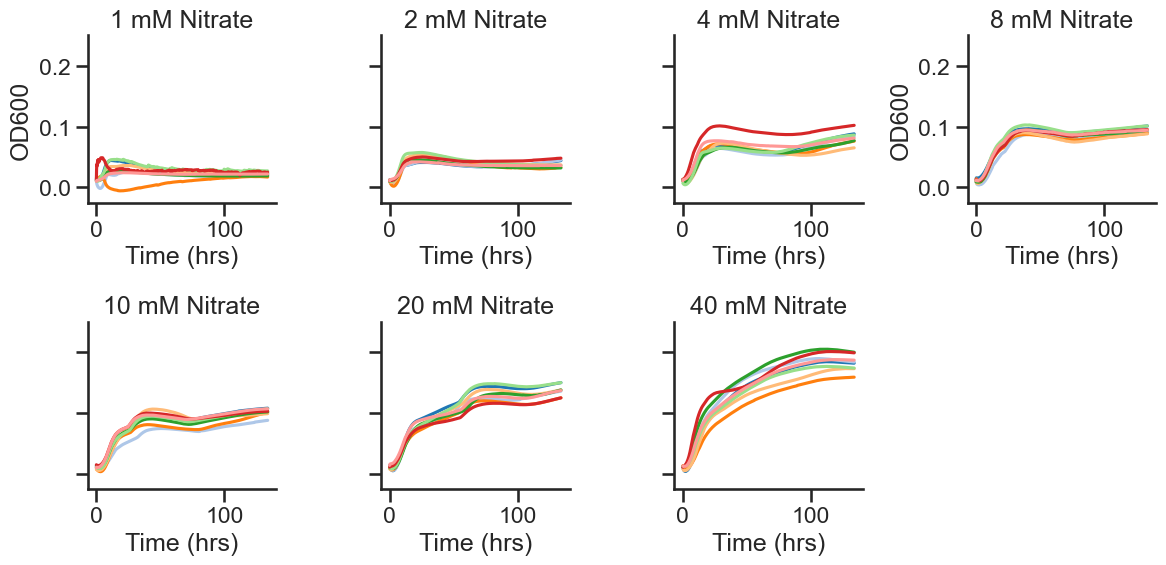

In [148]:
colors=sns.color_palette('tab20',12)
maxOD={}
fig= plt.figure(figsize=(12,6))
trash=[('5 mM Nitrite', '4')]
j=1
res=pd.DataFrame()
for media in ['1 mM Nitrate', '2 mM Nitrate', '4 mM Nitrate', '8 mM Nitrate',
       '10 mM Nitrate', '20 mM Nitrate', '40 mM Nitrate']:
    df = mapped[mapped.media==media]
    if media =='Empty':
        break
    ax=fig.add_subplot(2,4,j)
    ax.set_title(media)
    lags[media]=[]
    i=0
  
    for rep,df2 in df.groupby(by='replicate'):
        if rep == '9' or (media,rep) in trash:
            continue
        df2=df2.loc[:,['Time (hrs)','mA','OD1','OD2']]
        ewm=df2.ewm(span = 25).mean()
        x=ewm.iloc[[0,-1]]['mA'].values
        y=ewm[['OD1','OD2']].iloc[0].values
        fit = linregress(x,y)
        
        x2=ewm['Time (hrs)'].values
        y2=ewm['mA'].values
        y3=fit.slope*y2+fit.intercept
        
        ax.plot(x2,y3,color=colors[i])
        i+=1

     
        od=pd.DataFrame([x2,y3]).T
        od.columns=['Time (hrs)','OD600']
        od['media']=media
        od['replicate']=rep
        res=pd.concat([res,od])
    plt.ylim(-.025,.25)
    if j != 1 and j != 4:
        ax.set_yticklabels([])
    else:
        ax.set_ylabel('OD600')
    ax.set_xlabel('Time (hrs)')
    j+=1
    
plt.tight_layout()
#plt.savefig('3H11-ODin-OD600.png',dpi=250,bbox_inches='tight')

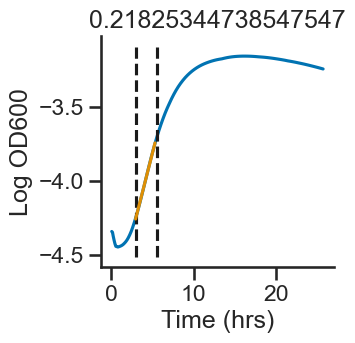

/opt/anaconda3/envs/py3/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Figure size 640x480 with 0 Axes>

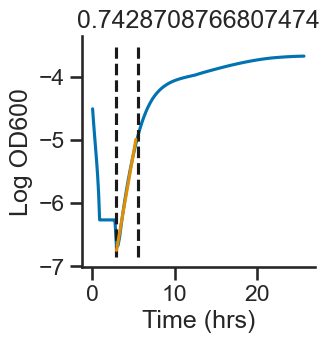

/opt/anaconda3/envs/py3/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Figure size 640x480 with 0 Axes>

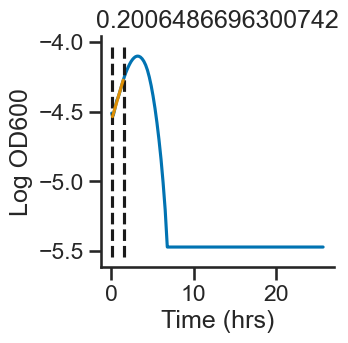

<Figure size 640x480 with 0 Axes>

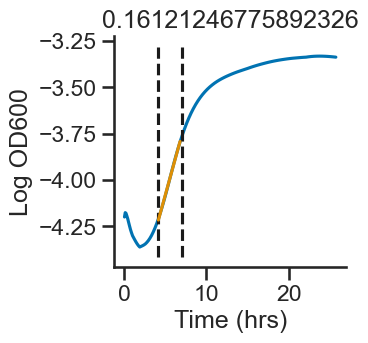

<Figure size 640x480 with 0 Axes>

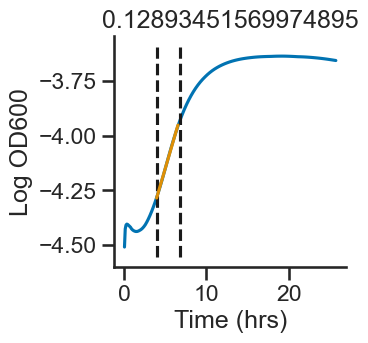

<Figure size 640x480 with 0 Axes>

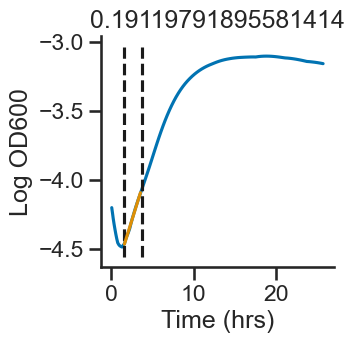

<Figure size 640x480 with 0 Axes>

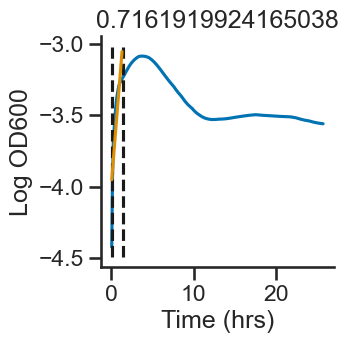

<Figure size 640x480 with 0 Axes>

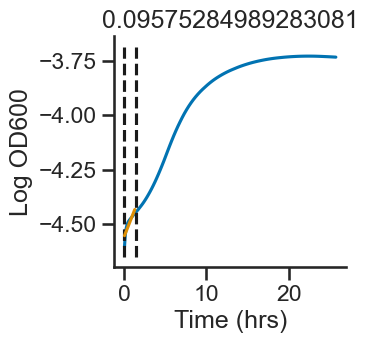

<Figure size 640x480 with 0 Axes>

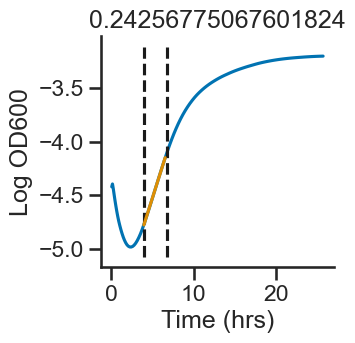

<Figure size 640x480 with 0 Axes>

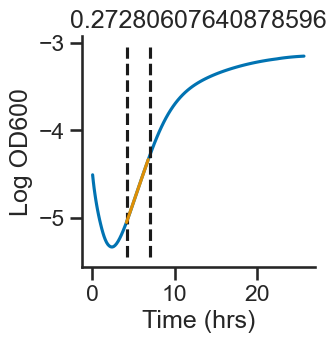

<Figure size 640x480 with 0 Axes>

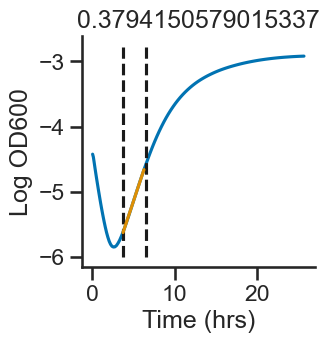

<Figure size 640x480 with 0 Axes>

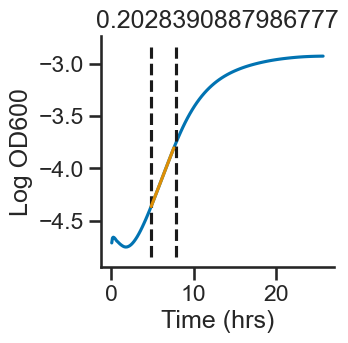

<Figure size 640x480 with 0 Axes>

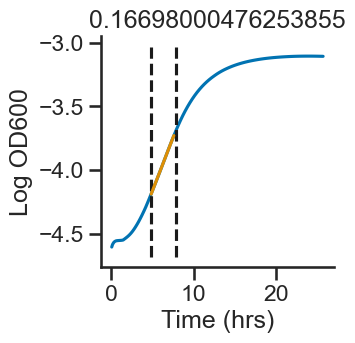

<Figure size 640x480 with 0 Axes>

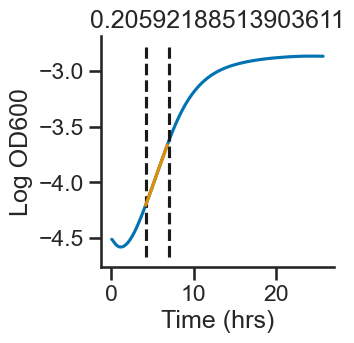

<Figure size 640x480 with 0 Axes>

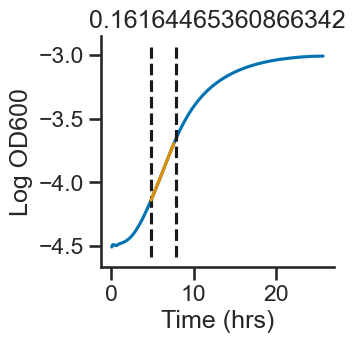

<Figure size 640x480 with 0 Axes>

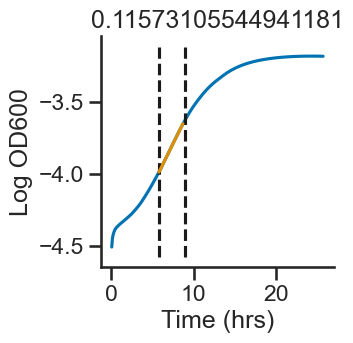

<Figure size 640x480 with 0 Axes>

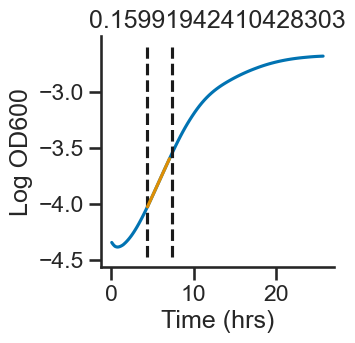

<Figure size 640x480 with 0 Axes>

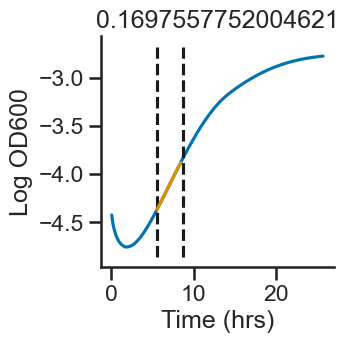

<Figure size 640x480 with 0 Axes>

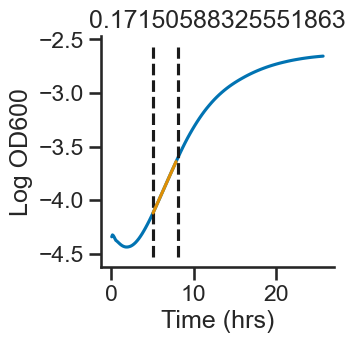

<Figure size 640x480 with 0 Axes>

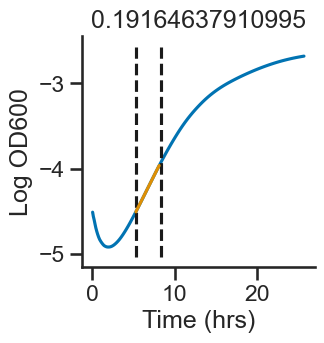

<Figure size 640x480 with 0 Axes>

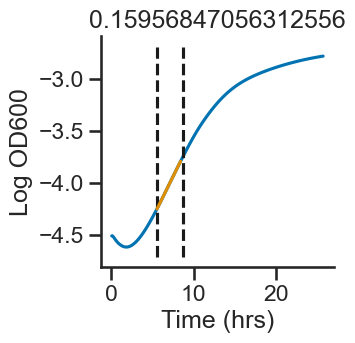

<Figure size 640x480 with 0 Axes>

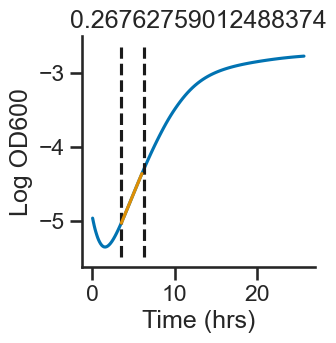

<Figure size 640x480 with 0 Axes>

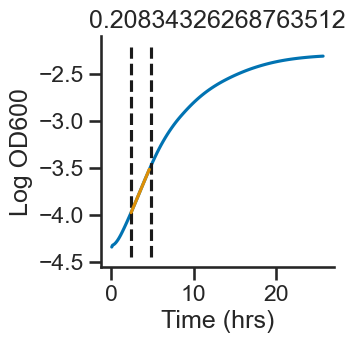

<Figure size 640x480 with 0 Axes>

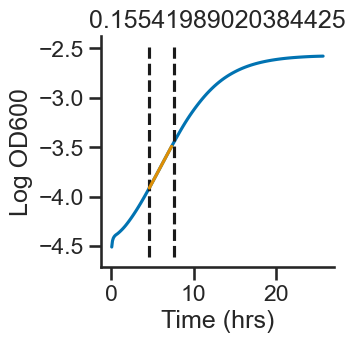

<Figure size 640x480 with 0 Axes>

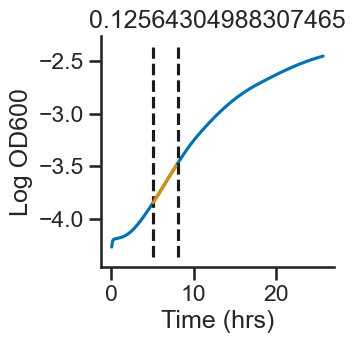

<Figure size 640x480 with 0 Axes>

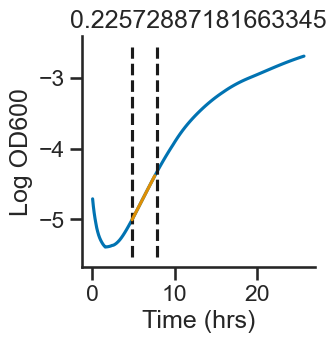

<Figure size 640x480 with 0 Axes>

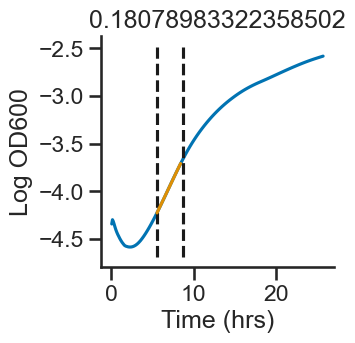

<Figure size 640x480 with 0 Axes>

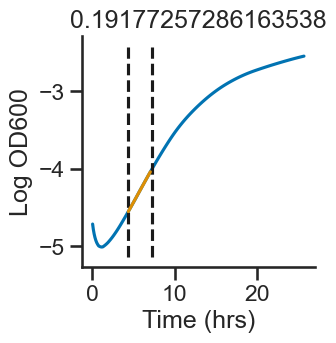

<Figure size 640x480 with 0 Axes>

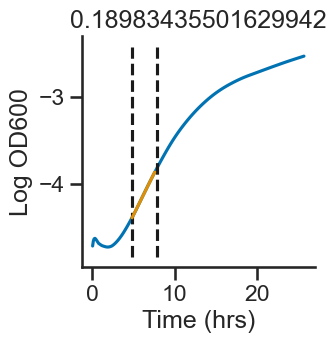

<Figure size 640x480 with 0 Axes>

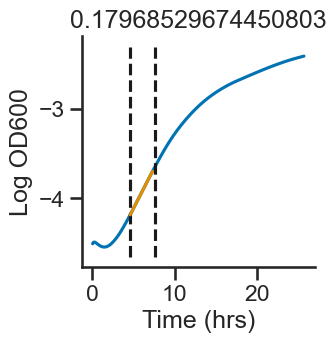

<Figure size 640x480 with 0 Axes>

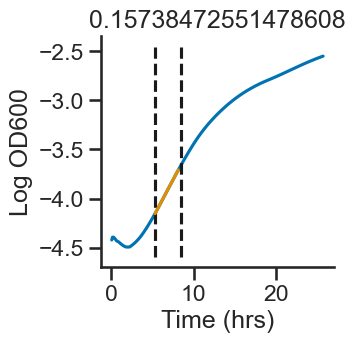

<Figure size 640x480 with 0 Axes>

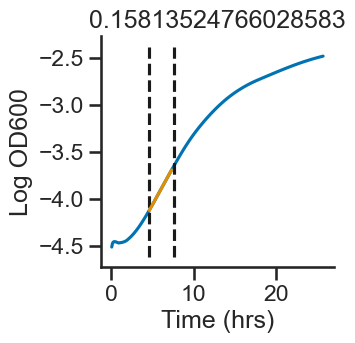

<Figure size 640x480 with 0 Axes>

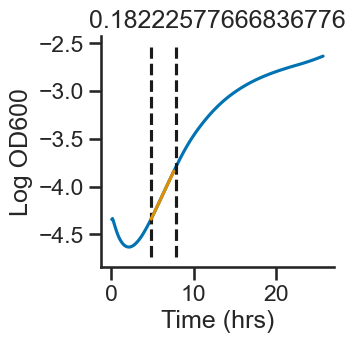

<Figure size 640x480 with 0 Axes>

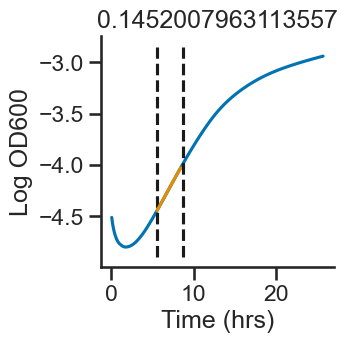

<Figure size 640x480 with 0 Axes>

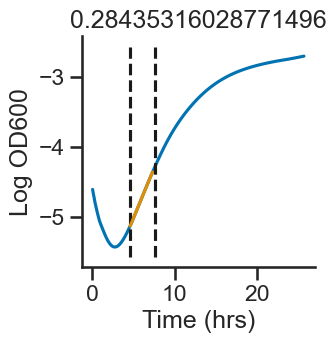

<Figure size 640x480 with 0 Axes>

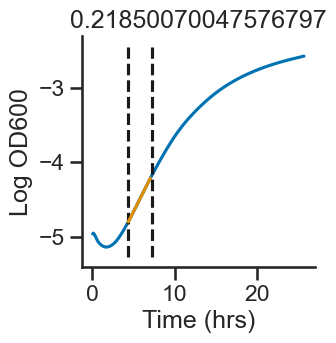

<Figure size 640x480 with 0 Axes>

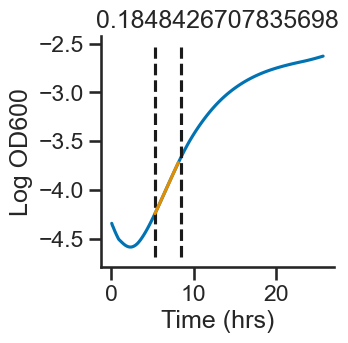

<Figure size 640x480 with 0 Axes>

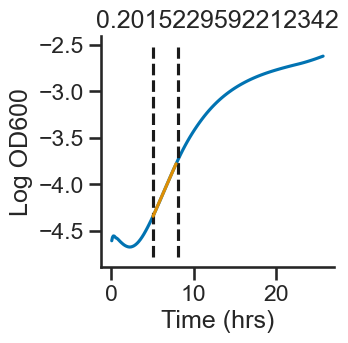

<Figure size 640x480 with 0 Axes>

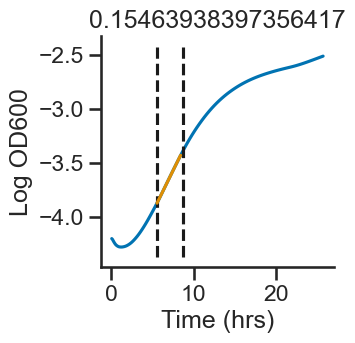

<Figure size 640x480 with 0 Axes>

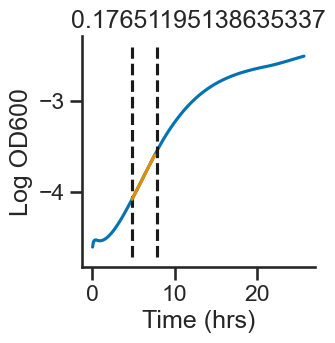

<Figure size 640x480 with 0 Axes>

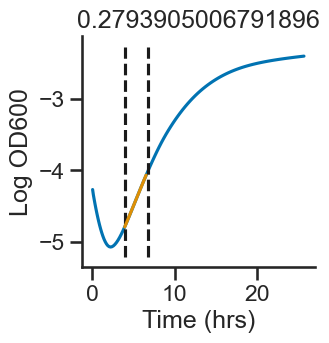

<Figure size 640x480 with 0 Axes>

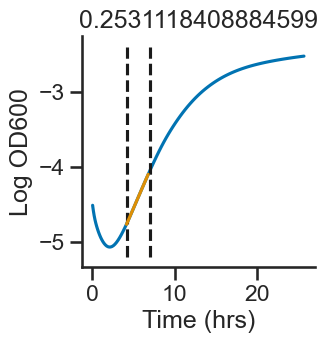

<Figure size 640x480 with 0 Axes>

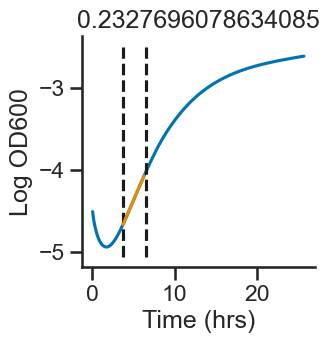

<Figure size 640x480 with 0 Axes>

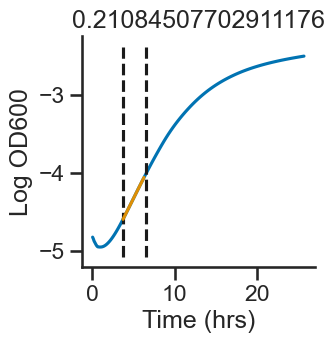

<Figure size 640x480 with 0 Axes>

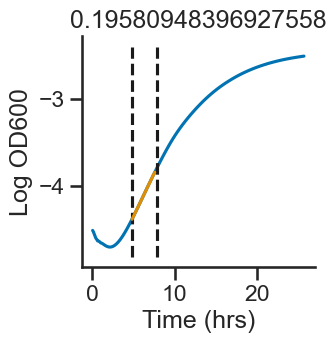

<Figure size 640x480 with 0 Axes>

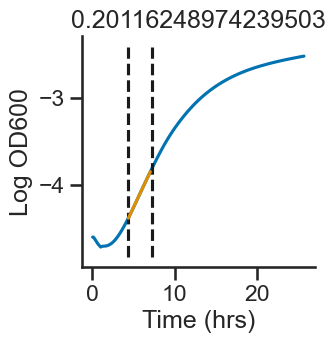

<Figure size 640x480 with 0 Axes>

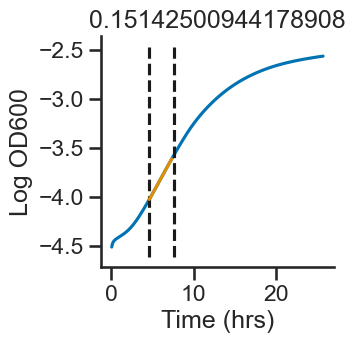

<Figure size 640x480 with 0 Axes>

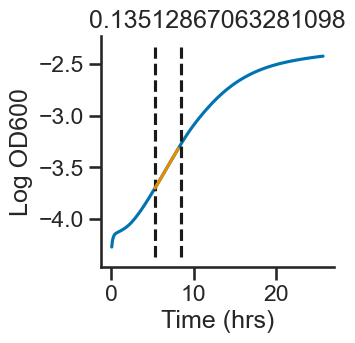

<Figure size 640x480 with 0 Axes>

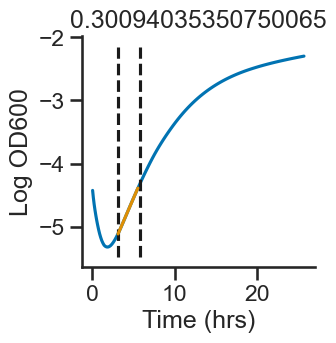

<Figure size 640x480 with 0 Axes>

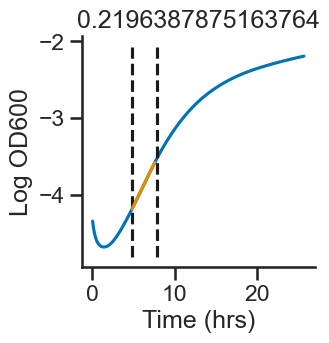

<Figure size 640x480 with 0 Axes>

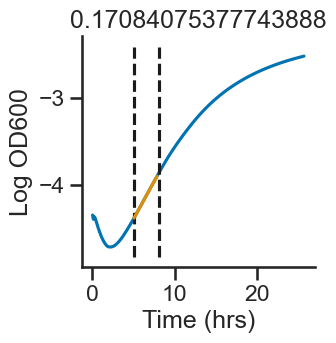

<Figure size 640x480 with 0 Axes>

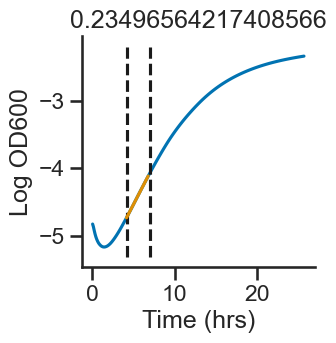

<Figure size 640x480 with 0 Axes>

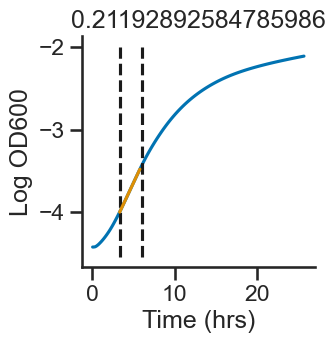

<Figure size 640x480 with 0 Axes>

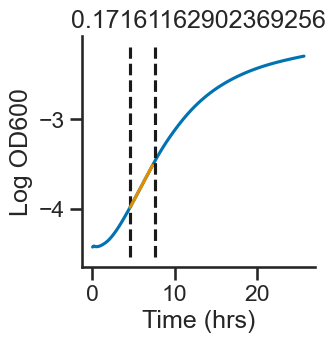

<Figure size 640x480 with 0 Axes>

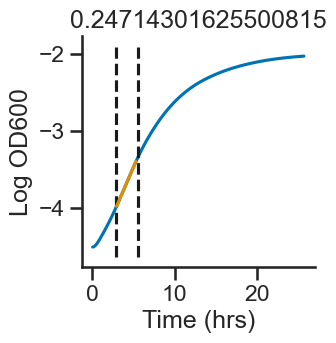

<Figure size 640x480 with 0 Axes>

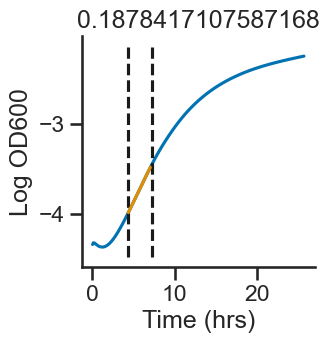

<Figure size 640x480 with 0 Axes>

In [149]:
w=12

pos=0
rates=pd.DataFrame()
j=0
vals=[]
for media in ['1 mM Nitrate', '2 mM Nitrate', '4 mM Nitrate', '8 mM Nitrate',
       '10 mM Nitrate', '20 mM Nitrate', '40 mM Nitrate']:
    for  rep in '12345678':
        df=res[(res.media==media)&(res.replicate==rep)]
        if len(df)==0:
            continue
        x=df['Time (hrs)'][:100].ewm(10).mean().values
        y=np.log(df['OD600'][:100]).ewm(10).mean().values
       
        rate=0
        R2=0
        for i in range(len(x)-w+1):
            fit=linregress(x[i:i+w],y[i:i+w])
            slope = fit.slope
            r2=(fit.rvalue)**2
            vals.append(slope)
            if r2 > R2 and slope > rate:
                rate = slope
                intercept=fit.intercept
                R2=r2
                pos=i
                
        plt.figure(figsize=(3,3))
        plt.plot(x,y)
        ylim=plt.ylim()
        plt.plot((x[pos],x[pos]),ylim,'k--')
        plt.plot((x[pos+w],x[pos+w]),ylim,'k--')
        xfit=x[pos:pos+w]
        yfit=xfit*rate+intercept
        plt.plot(xfit,yfit)
        plt.xlabel('Time (hrs)')
        plt.ylabel('Log OD600')
        plt.title(rate)
        plt.show()
        plt.clf()
        rates.loc[j,'rate']=rate
        rates.loc[j,'condition']=media
        rates.loc[j,'rep']=rep
        j+=1
        
        


<Axes: xlabel='nitrate', ylabel='rate'>

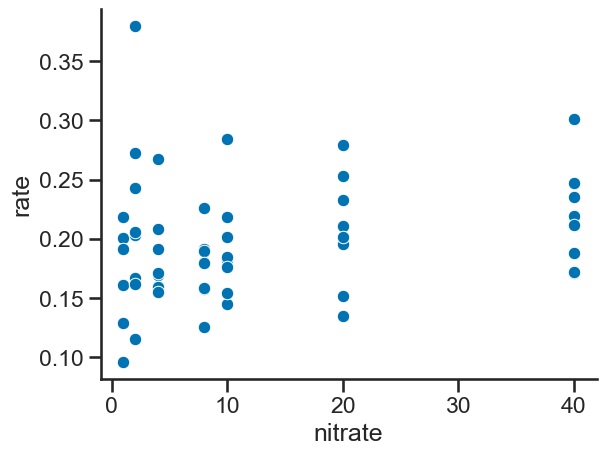

In [153]:
rates=rates[rates.rate<.5]
sns.scatterplot(x=rates.nitrate,y=rates.rate)

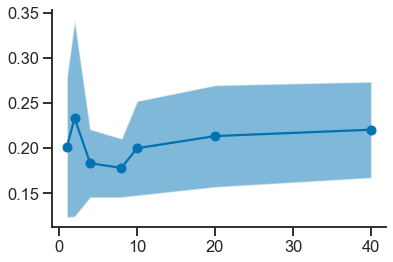

In [145]:
mean=rates.groupby(by='condition').mean().loc[['1 mM Nitrate', '2 mM Nitrate', '4 mM Nitrate', '8 mM Nitrate',
       '10 mM Nitrate', '20 mM Nitrate', '40 mM Nitrate']]
std=rates.groupby(by='condition').std().loc[['1 mM Nitrate', '2 mM Nitrate', '4 mM Nitrate', '8 mM Nitrate',
       '10 mM Nitrate', '20 mM Nitrate', '40 mM Nitrate']]
plt.plot(mean['nitrate'],mean['rate'],marker='o')
plt.fill_between(mean['nitrate'],mean['rate']-std['rate'],mean['rate']+std['rate'],alpha=0.5)

/var/folders/06/47zwkw994h38rfpphgtmmm380000gq/T/ipykernel_99671/1319715178.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='condition',y='rate',data=rates,palette=colors)
/var/folders/06/47zwkw994h38rfpphgtmmm380000gq/T/ipykernel_99671/1319715178.py:2: UserWarning: The palette list has more values (12) than needed (7), which may not be intended.
  sns.boxplot(x='condition',y='rate',data=rates,palette=colors)


Text(0, 0.5, 'Max Growth Rate')

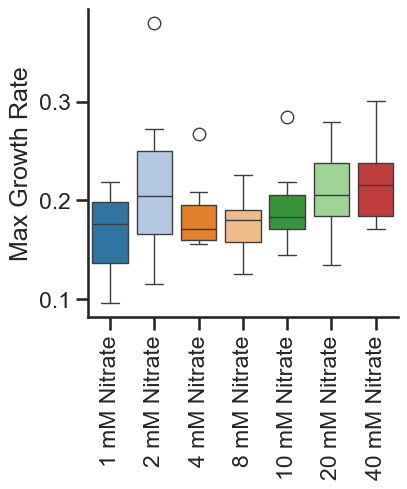

In [154]:
plt.figure(figsize=(4,4))
sns.boxplot(x='condition',y='rate',data=rates,palette=colors)
xticks=plt.xticks(rotation=90)
plt.xlabel('')
plt.ylabel('Max Growth Rate')
#plt.savefig('3H11 Max Growth Rate.png',dpi=500,bbox_inches='tight')

(-0.01, 0.21)

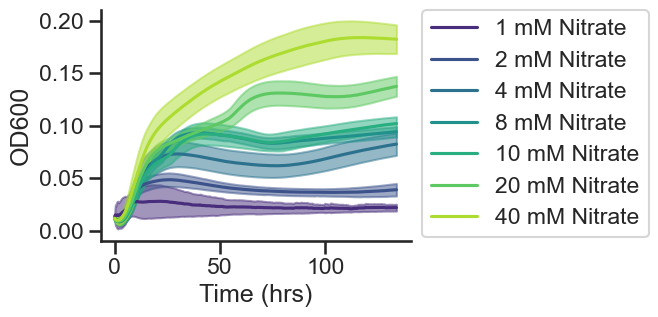

In [155]:
res.replicate=res.replicate.astype(int)
mean=res.groupby(by=['media','Time (hrs)']).mean()
std=res.groupby(by=['media','Time (hrs)']).std()
conditions=['1 mM Nitrate', '2 mM Nitrate', '4 mM Nitrate', '8 mM Nitrate',
       '10 mM Nitrate', '20 mM Nitrate', '40 mM Nitrate']
colors=sns.color_palette('viridis',7)
#colors=[colors[0],colors[1],colors[2],colors[3],colors[4],colors[7],colors[9]]
plt.figure(figsize=(4,3))
i=0
for idx in conditions:
    
    df=mean.loc[idx].reset_index()
    #df['OD600']=df['OD600']-df['OD600'].min()
    err=std.loc[idx].reset_index()
    plt.plot(df['Time (hrs)'],df['OD600'],label=idx,color=colors[i])
    plt.fill_between(df['Time (hrs)'].values,df['OD600'].values-err['OD600'].values,df['OD600'].values+err['OD600'].values,alpha=0.5,color=colors[i])
   
    i+=1
plt.xlabel('Time (hrs)')
plt.ylabel('OD600')
plt.legend(bbox_to_anchor=(1,1.05),loc=2)

#plt.yscale('log')
#plt.xlim(0,50)
plt.ylim(-.01,0.21)
#plt.xticks([0,50,100,150])
#plt.savefig('3H11-Nitrate-Yield.pdf',bbox_inches='tight')

([<matplotlib.axis.XTick at 0x320b18ce0>,
 [Text(0, 0, '0'),
  Text(10, 0, '10'),
  Text(20, 0, '20'),
  Text(30, 0, '30'),
  Text(40, 0, '40')])

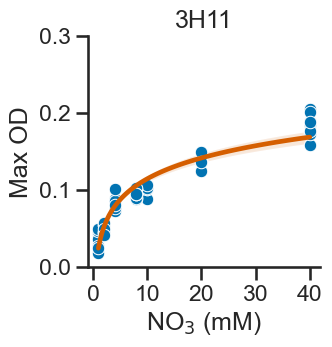

In [156]:
res['nitrate']=[int(x.split()[0]) for x in res.media]
maxod=res.groupby(by=['media','replicate']).max().reset_index()
plt.figure(figsize=(3,3))
sns.regplot(x='nitrate',y='OD600',logx=True,data=maxod,scatter=False,color='r')
sns.scatterplot(x='nitrate',y='OD600',data=maxod)
plt.ylim(0,.3)
#plt.xlim(0,1200)
plt.xlabel('NO$_3$ (mM)')
plt.ylabel('Max OD')
plt.title('3H11')
plt.xticks([0,10,20,30,40])
#plt.savefig('3H11-NO3-maxOD.pdf',bbox_inches='tight')